In [129]:
pip install matplotlib

You should consider upgrading via the 'C:\Users\Wahyudi Prasidhatama\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [130]:
# 1 id: patient identification number
# 2 ccf: social security number (I replaced this with a dummy value of 0)
# 3 age: age in years
# 4 sex: sex (1 = male; 0 = female)
# 5 painloc: chest pain location (1 = substernal; 0 = otherwise)
# 6 painexer (1 = provoked by exertion; 0 = otherwise)
# 7 relrest (1 = relieved after rest; 0 = otherwise)
# 8 pncaden (sum of 5, 6, and 7)
# 9 cp: chest pain type
# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic
# 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# 11 htn
# 12 chol: serum cholestoral in mg/dl
# 13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
# 14 cigs (cigarettes per day)
# 15 years (number of years as a smoker)
# 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 17 dm (1 = history of diabetes; 0 = no such history)
# 18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
# 19 restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree


In [132]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Find and Edit the Missing Value

### Never search for missing value like this

In [133]:
df.isnull().values.any() #no NaN value

False

### Instead search for missing value like this

In [134]:
df.columns = ['age','sex','cp','restbp','chol','fbs','resttecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,resttecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [135]:
df.dtypes

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
resttecg    float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [136]:
#ca and thal has object type, which is most of the time is not represent a number value, but more toward categorical value
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [137]:
df['thal']

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: object

In [138]:
df.value_counts()

age   sex  cp   restbp  chol   fbs  resttecg  thalach  exang  oldpeak  slope  ca   thal  hd
29.0  1.0  2.0  130.0   204.0  0.0  2.0       202.0    0.0    0.0      1.0    0.0  3.0   0     1
59.0  1.0  4.0  138.0   271.0  0.0  2.0       182.0    0.0    0.0      1.0    0.0  3.0   0     1
                110.0   239.0  0.0  2.0       142.0    1.0    1.2      2.0    1.0  7.0   2     1
           3.0  150.0   212.0  1.0  0.0       157.0    0.0    1.6      1.0    0.0  3.0   0     1
                126.0   218.0  1.0  0.0       134.0    0.0    2.2      2.0    1.0  6.0   2     1
                                                                                              ..
51.0  1.0  3.0  100.0   222.0  0.0  0.0       143.0    1.0    1.2      2.0    0.0  3.0   0     1
                94.0    227.0  0.0  0.0       154.0    1.0    0.0      1.0    1.0  7.0   0     1
           1.0  125.0   213.0  0.0  2.0       125.0    1.0    1.4      1.0    1.0  3.0   0     1
      0.0  4.0  130.0   305.0  0.0 

In [139]:
missing_value = df.loc[(df['ca']=='?') | (df['thal']=='?')]
len(missing_value)

#showing the missing_value

6

In [140]:
filt_missing_value = (df['ca']=='?') | (df['thal']=='?')
df[filt_missing_value]

#there are no '?' in same row with different column

,age,sex,cp,restbp,chol,fbs,resttecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [141]:
df.shape

(303, 14)

In [142]:
(6/303)*100

#we have 6 missing value out of 303 data, which is about 2%, it's better to just delete the row with missing vaue rather than filling the missing data

1.9801980198019802

In [143]:
df1 = df_no_missing_value = df.loc[(df['ca']!='?') & (df['thal']!='?')]
len(df1)


297

In [144]:
df1.shape

(297, 14)

# Format the Data into Dependent and Independent Variables

In [145]:
#specified the variable to make prediction (x) and variable which we'll predict (y)
X = df1.drop(['hd'],axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,resttecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [146]:
#specified the variable to make prediction (x) and variable which we'll predict (y)
y = df1['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format the Data part 2 : One-Hot Encoding

In [147]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,resttecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [148]:
X_encoded =  pd.get_dummies(X, columns=['cp','resttecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,resttecg_0.0,resttecg_1.0,resttecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [149]:
#we need to predict y (heard disease), we can make a classification based on wether people has heart disease (1) or not (0)

y_not_zero_index = y>0
y[y_not_zero_index]=1
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

# Build the Pre-Eliminary Classification Tree

In [150]:
#Split the data into Test and Train
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

#Create decision tree classifier object
clf_dt = DecisionTreeClassifier(random_state=42)

#Create the decision tree and fit into the data (Train Data)
clf_dt = clf_dt.fit(X_train,y_train)



In [151]:
# predict the response for data test 

y_pred = clf_dt.predict(X_test)

## Visualize the Decision Tree

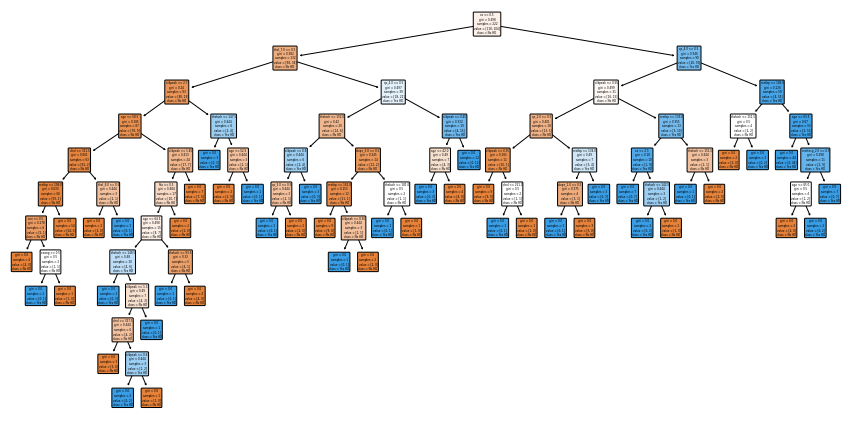

In [152]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['No HD','Yes HD'],
          feature_names= X_encoded.columns);

C:\Users\Wahyudi Prasidhatama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


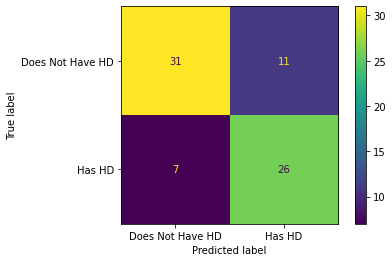

In [153]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels =['Does Not Have HD', 'Has HD'])

# Cost Complexity Pruning Part 1: Visualize Alpha vs Accuracy

In [177]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha

clf_dts = [] #create empty array to storage the decision tree

#create one decision tree per value for alpha and store it on the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)
    
print(ccp_alpha)

0.039345232893619964


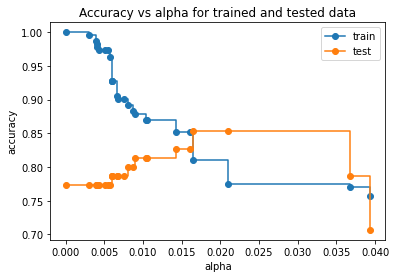

In [155]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for trained and tested data')
ax.plot(ccp_alphas,train_scores, marker='o', label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores, marker='o', label='test',drawstyle='steps-post')
ax.legend()
plt.show()

# Cost Complexity Pruning Part 2: Cross Validation For Finding The Best Alpha

In [156]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) #create tree with alpha 0.016

#now use 5-fold cross validation to create 5 different training and test data sets 
#NOTE : we use 5-fold cross validation because we dont have ton of data

scores = cross_val_score(clf_dt,X_train,y_train, cv=5)
df2 = pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df2.head()

,tree,accuracy
0,0,0.533333
1,1,0.866667
2,2,0.750000
3,3,0.750000
4,4,0.772727


<AxesSubplot:xlabel='tree'>

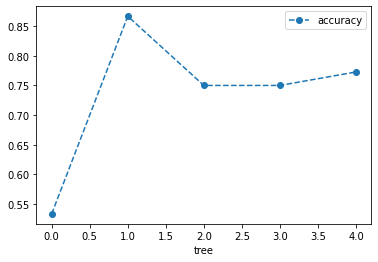

In [158]:
df2.plot(x='tree',y ='accuracy',marker='o',linestyle='--')

#we can see that accuract is sensitive to data sets although value of alpha is same (0.016)
#Therefore we need to find the best split data to produce best accuracy

In [161]:
#for each candidate value for alpha, we run 5 fold-cross validation
#we store the mean and standard deviation of the scores (the accuracy) for each call
#to cross_val_Score in alpha_loop_values
alpha_loop_values=[]

for ccp_alpha in ccp_alphas :
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores) ,np.std(scores)])


<AxesSubplot:xlabel='alpha'>

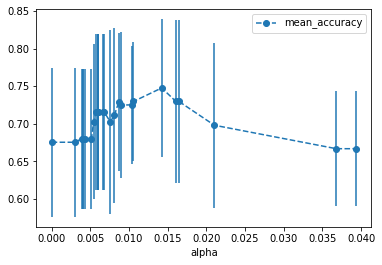

In [164]:
#Now draw a graph that visualize means and standard deviation of the scores for each candidate value of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha' ,
                   y='mean_accuracy' ,
                   yerr='std' ,
                   marker='o' ,
                   linestyle='--')


In [166]:
#from graph we can see that the best accuracy value is something closer to 0.014 
#we need to find the exact value between 0.014 and 0.015

alpha_results[(alpha_results['alpha']>0.014) & 
              (alpha_results['alpha']<0.015)]



,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [170]:
#we find the exact value of alpha is 0.014225

ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) & 
              (alpha_results['alpha']<0.015)]['alpha']

ideal_ccp_alpha

#we need to conver ideal_ccp_alpha to a float, which is now is an array with index is 20

20    0.014225
Name: alpha, dtype: float64

In [173]:
ideal_ccp_alpha=float(ideal_ccp_alpha)

ideal_ccp_alpha


0.014224751066856332

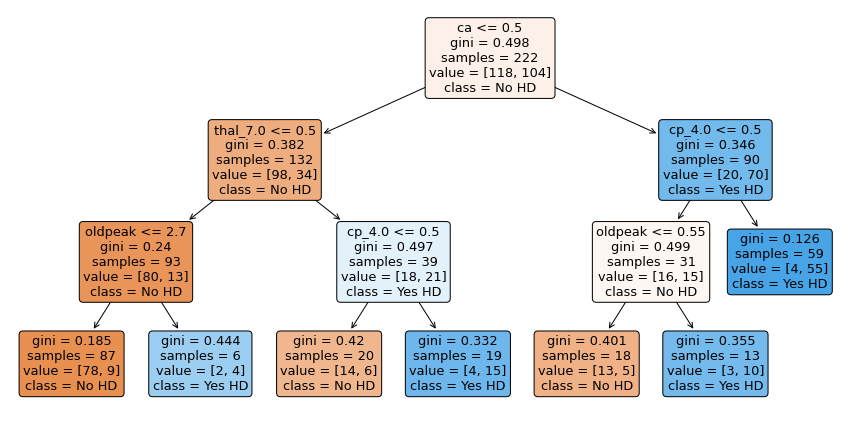

In [181]:
#Now we can draw the Final optimized Decision Tree
#Create decision tree classifier object
clf_dt_optimized = DecisionTreeClassifier(random_state=42 ,
                                         ccp_alpha=ideal_ccp_alpha)

#Create the decision tree and fit into the data (Train Data)
clf_dt_optimized = clf_dt_optimized.fit(X_train,y_train)


plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_optimized,
          filled=True,
          rounded=True,
          class_names=['No HD','Yes HD'],
          feature_names= X_encoded.columns);


C:\Users\Wahyudi Prasidhatama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


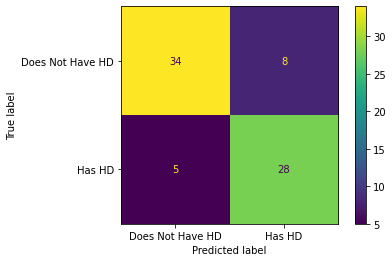

In [182]:
plot_confusion_matrix(clf_dt_optimized,X_test,y_test,display_labels =['Does Not Have HD' ,
                                                            'Has HD'])